In [ ]:
# Detect if we are in Google Colaboratory
try:
    import google.colab
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

from pathlib import Path
# Determine the locations of auxiliary libraries and datasets.
# `AUX_DATA_ROOT` is where 'notmnist.py', 'animation.py' and 'tiny-imagenet-2020.zip' are.
if IN_COLAB:
    google.colab.drive.mount("/content/drive")
    
    # Change this if you created the shortcut in a different location
    AUX_DATA_ROOT = Path("/content/drive/My Drive/SberMarket_data")
    
    assert AUX_DATA_ROOT.is_dir(), "Have you forgot to 'Add a shortcut to Drive'?"
else:
    AUX_DATA_ROOT = Path(".")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Extract the dataset into the current directory
if not Path("sbermarket_tab_2_1/tab_2_products_2020-01-01.csv").is_file():
    import zipfile
    with zipfile.ZipFile(AUX_DATA_ROOT / 'test-recsys.zip', 'r') as archive:
        archive.extractall()

In [ ]:
import pandas as pd
import os

In [ ]:
orders_data = pd.read_csv("kaggle_tab_1345/tab_1_orders.csv")
categories_data = pd.read_csv("kaggle_tab_1345/tab_3_categories.csv")
user_profile_data = pd.read_csv("kaggle_tab_1345/tab_4_user_profiles.csv")
product_properties_data = pd.read_csv("kaggle_tab_1345/tab_5_product_properties.csv")

In [ ]:
orders_data

,user_id,order_id,order_created_time,retailer,store_id,platform
0,72,17431000,2020-09-26 10:48:57,METRO,21,app
1,83,9718154,2020-05-08 09:46:18,METRO,87,web
2,142,10056850,2020-05-14 15:06:03,METRO,320,app
3,187,15952443,2020-09-01 17:34:00,ВкусВилл,533,app
4,224,10409918,2020-05-20 06:32:50,Ашан,183,web
...,...,...,...,...,...,...
2461953,3432957,15948419,2020-09-01 15:41:27,Лента,218,app
2461954,3432966,16855344,2020-09-17 10:16:16,Лента,130,app
2461955,3432977,9214726,2020-04-29 10:09:37,Лента,373,app
2461956,3433000,17739392,2020-09-30 09:18:19,Лента,781,undefined


In [ ]:
categories_data

,id,name,parent_id
0,1,Продукты питания,0
1,2,Замороженные продукты,1
2,3,Замороженные овощи и фрукты,2
3,4,Замороженные полуфабрикаты,2
4,5,Рыба замороженная,2
...,...,...,...
1011,1012,Перевязочные материалы,571
1012,1013,Расходные материалы,571
1013,1014,Диагностические тесты,571
1014,1015,Диагностические приборы,571


In [ ]:
user_profile_data

,user_id,gender,bdate
0,2224890,NaN,NaN
1,1683001,male,1987-10-11
2,2102480,NaN,NaN
3,2224895,NaN,NaN
4,930197,NaN,NaN
...,...,...,...
438862,3424212,female,1997-09-15
438863,3424222,male,1978-09-18
438864,3424225,female,1981-11-02
438865,3424228,female,1993-10-04


In [ ]:
user_data = pd.concat([orders_data, user_profile_data], axis=1, sort=False)

In [ ]:
user_data

,user_id,order_id,order_created_time,retailer,store_id,platform,user_id,gender,bdate
0,72,17431000,2020-09-26 10:48:57,METRO,21,app,2224890.0,NaN,NaN
1,83,9718154,2020-05-08 09:46:18,METRO,87,web,1683001.0,male,1987-10-11
2,142,10056850,2020-05-14 15:06:03,METRO,320,app,2102480.0,NaN,NaN
3,187,15952443,2020-09-01 17:34:00,ВкусВилл,533,app,2224895.0,NaN,NaN
4,224,10409918,2020-05-20 06:32:50,Ашан,183,web,930197.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2461953,3432957,15948419,2020-09-01 15:41:27,Лента,218,app,NaN,NaN,NaN
2461954,3432966,16855344,2020-09-17 10:16:16,Лента,130,app,NaN,NaN,NaN
2461955,3432977,9214726,2020-04-29 10:09:37,Лента,373,app,NaN,NaN,NaN
2461956,3433000,17739392,2020-09-30 09:18:19,Лента,781,undefined,NaN,NaN,NaN


In [ ]:
transaction_data = pd.read_csv(f"{AUX_DATA_ROOT}"+"/transaction_data_all_selected.csv")

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
transaction_data = transaction_data.drop(['product_name'], axis=1)

In [ ]:
transaction_data

,user_id,order_id,line_item_id,price,quantity,discount,product_id,brand_name,master_category_id,parent_category_id
0,51,7128914,46765344,219.899994,4,0.000000,65326,Без бренда,91.0,90
1,51,7128914,46766190,369.000000,1,0.000000,15106,Меридиан,118.0,112
2,51,7128914,46766274,255.000000,2,0.000000,2835298,Amore,118.0,112
3,51,7128914,46766472,249.000000,1,0.000000,5604,NaN,118.0,112
4,51,7128914,46766513,282.989990,1,0.000000,5555,Меридиан,118.0,112
...,...,...,...,...,...,...,...,...,...,...
21677065,3142875,15626637,173268439,69.290001,1,28.500000,67694,Makfa,577.0,9
21677066,3142875,15626637,173268681,109.889999,1,39.900002,68465,Zewa,222.0,221
21677067,3142875,15626637,173270630,185.990005,2,125.599998,5075130,Purina,347.0,345
21677068,3142875,15626637,173446934,185.990005,1,125.599998,9741,Purina,347.0,345


In [ ]:
transaction_data.user_id.unique()

array([     51,    1012,    1132, ..., 3142774, 3142820, 3142875])

In [ ]:
data51 = transaction_data.loc[transaction_data['user_id'] == 51]

In [ ]:
dict(data51.product_id.value_counts()[:50]).keys()

dict_keys([14863, 63057, 19562, 3562687, 709, 9979, 3817489, 5501, 661, 456, 655, 54710, 54728, 562, 3817538, 2600, 57399, 6005183, 87007, 407, 50190, 46762, 55049, 3562686, 84364, 84365, 63724, 55133, 5481648, 0, 64633, 57398, 3817487, 16219, 5851, 93822, 93825, 58780, 64216, 4830888, 50539, 3497570, 58839, 487, 38512, 25198, 27471, 7061902, 3817571, 63725])

In [ ]:
# data51.product_id.value_counts()[:50]
results = {}
from tqdm import tqdm

In [ ]:
for usr_id in tqdm(transaction_data.user_id.unique()):
  selected_data = transaction_data.loc[transaction_data['user_id'] == usr_id]
  pred = dict(selected_data.product_id.value_counts()[:50]).keys()
  results[usr_id] = list(pred)

  0%|          | 254/107068 [00:07<55:42, 31.96it/s]


KeyboardInterrupt: ignored

In [ ]:
results_df = transaction_data[['user_id', 'product_id']].groupby(['user_id']).agg(['value_counts'])

In [ ]:
results_df

product_id
                   value_counts
user_id product_id             
51      14863                16
        19562                13
        63057                13
        3562687              12
        709                  11
...                         ...
3142875 5044950               1
        5044951               1
        5075130               1
        5075131               1
        7043716               1

[15124321 rows x 1 columns]

In [ ]:
modif_res = results_df.reset_index()

In [ ]:
modif_res

user_id product_id             
                             value_counts
0              51      14863           16
1              51      19562           13
2              51      63057           13
3              51    3562687           12
4              51        709           11
...           ...        ...          ...
15124316  3142875    5044950            1
15124317  3142875    5044951            1
15124318  3142875    5075130            1
15124319  3142875    5075131            1
15124320  3142875    7043716            1

[15124321 rows x 3 columns]

In [ ]:
modif_res.loc[modif_res['user_id'] == modif_res.user_id.unique()[10]]

user_id product_id             
                        value_counts
1633    1221       2578            4
1634    1221       9959            3
1635    1221       2542            2
1636    1221      39627            2
1637    1221      39629            2
1638    1221      57832            2
1639    1221      58032            2
1640    1221      58812            2
1641    1221     196879            2
1642    1221    4274968            2
1643    1221    4276318            2
1644    1221          0            1
1645    1221       1987            1
1646    1221       1989            1
1647    1221       1990            1
1648    1221       7401            1
1649    1221      15535            1
1650    1221      20408            1
1651    1221      21495            1
1652    1221      22993            1
1653    1221      25166            1
1654    1221      39631            1
1655    1221      58352            1
1656    1221      59771            1
1657    1221      78796            1
1658    1221     199801            1
1659    1221    6694783            1

In [ ]:
# modif_res.to_csv(f"{AUX_DATA_ROOT}"+"/prediction_raw.csv", index = False)

In [ ]:
modif_res_2 = modif_res[~modif_res.user_id.isin(modif_res.user_id.value_counts().loc[lambda x: x > 50].index)]

In [ ]:
RESULT = None

In [ ]:
for usr_id in tqdm(modif_res.user_id.unique()):
  if RESULT is None:
    RESULT = modif_res.iloc[:50]
  else:
    RESULT = pd.concat([RESULT, modif_res.iloc[:50]])
  modif_res = modif_res[modif_res.user_id != usr_id]                      



  0%|          | 0/107068 [00:00<?, ?it/s]

  0%|          | 1/107068 [00:00<11:50:22,  2.51it/s]

  0%|          | 2/107068 [00:00<11:27:17,  2.60it/s]

  0%|          | 3/107068 [00:01<11:16:03,  2.64it/s]

  0%|          | 4/107068 [00:01<11:01:33,  2.70it/s]

  0%|          | 5/107068 [00:01<10:53:56,  2.73it/s]

  0%|          | 6/107068 [00:02<10:45:44,  2.76it/s]

  0%|          | 7/107068 [00:02<10:46:10,  2.76it/s]

  0%|          | 8/107068 [00:02<10:39:19,  2.79it/s]

  0%|          | 9/107068 [00:03<10:44:55,  2.77it/s]

  0%|          | 10/107068 [00:03<10:39:18,  2.79it/s]

  0%|          | 11/107068 [00:03<10:35:04,  2.81it/s]

  0%|          | 12/107068 [00:04<10:37:02,  2.80it/s]

  0%|          | 13/107068 [00:04<10:38:16,  2.80it/s]

  0%|          | 14/107068 [00:05<10:37:27,  2.80it/s]

  0%|          | 15/107068 [00:05<10:41:27,  2.78it/s]

  0%|          | 16/107068 [00:05<10:36:50,  2.80it/s]

  0%|          | 17/107068 [00:06<10:34:57,  2.81it/s]

  0%|      

KeyboardInterrupt: ignored

In [ ]:
ransaction_data.loc[transaction_data['user_id'] == usr_id]

KeyError: ignored

In [ ]:
f, u = pd.factorize(modif_res.user_id)
tt = modif_res[np.bincount(f)[f] < 50]

In [ ]:
tt

user_id product_id             
                             value_counts
677           187      88084            1
678           187      88086            1
1633         1221       2578            4
1634         1221       9959            3
1635         1221       2542            2
...           ...        ...          ...
15124316  3142875    5044950            1
15124317  3142875    5044951            1
15124318  3142875    5075130            1
15124319  3142875    5075131            1
15124320  3142875    7043716            1

[889071 rows x 3 columns]

In [ ]:
tt.loc[tt['user_id'] == 1221]

user_id product_id             
                        value_counts
1633    1221       2578            4
1634    1221       9959            3
1635    1221       2542            2
1636    1221      39627            2
1637    1221      39629            2
1638    1221      57832            2
1639    1221      58032            2
1640    1221      58812            2
1641    1221     196879            2
1642    1221    4274968            2
1643    1221    4276318            2
1644    1221          0            1
1645    1221       1987            1
1646    1221       1989            1
1647    1221       1990            1
1648    1221       7401            1
1649    1221      15535            1
1650    1221      20408            1
1651    1221      21495            1
1652    1221      22993            1
1653    1221      25166            1
1654    1221      39631            1
1655    1221      58352            1
1656    1221      59771            1
1657    1221      78796            1
1658    1221     199801            1
1659    1221    6694783            1

In [ ]:
for usr_id in tqdm(modif_res.user_id.unique()):
  selected_data = transaction_data.loc[transaction_data['user_id'] == usr_id]
  pred = dict(selected_data.product_id.value_counts()[:50]).keys()
  results[usr_id] = list(pred)

In [ ]:
modif_res.iloc[:50]

user_id product_id             
                      value_counts
0       51      14863           16
1       51      19562           13
2       51      63057           13
3       51    3562687           12
4       51        709           11
5       51       9979           10
6       51        456            9
7       51        661            9
8       51       5501            9
9       51    3817489            9
10      51        655            8
11      51        562            7
12      51      54710            7
13      51      54728            7
14      51        407            6
15      51       2600            6
16      51      50190            6
17      51      57399            6
18      51      87007            6
19      51    3817538            6
20      51    6005183            6
21      51      46762            5
22      51      55049            5
23      51      84364            5
24      51      84365            5
25      51    3562686            5
26      51          0            4
27      51       5851            4
28      51      16219            4
29      51      55133            4
30      51      57398            4
31      51      63724            4
32      51      64633            4
33      51      93822            4
34      51      93825            4
35      51    3817487            4
36      51    5481648            4
37      51        487            3
38      51       5509            3
39      51       7397            3
40      51      16420            3
41      51      25198            3
42      51      27471            3
43      51      29788            3
44      51      38512            3
45      51      50539            3
46      51      56900            3
47      51      57383            3
48      51      57554            3
49      51      58780            3

In [ ]:
value_counts

In [ ]:
results_df.reset_index()

user_id product_id             
                             value_counts
0              51      14863           16
1              51      19562           13
2              51      63057           13
3              51    3562687           12
4              51        709           11
...           ...        ...          ...
15124316  3142875    5044950            1
15124317  3142875    5044951            1
15124318  3142875    5075130            1
15124319  3142875    5075131            1
15124320  3142875    7043716            1

[15124321 rows x 3 columns]

In [ ]:
asss = pd.read_csv("sbermarket_tab_2_1/tab_2_products_2020-01-01.csv")

In [ ]:
top_ar

[0,
 709,
 166,
 158,
 100,
 176,
 165,
 9959,
 1300,
 180,
 5217,
 10016,
 2544,
 39590,
 159,
 43,
 304,
 10095,
 170,
 14564,
 55133,
 3497419,
 399,
 104,
 224,
 61,
 2600,
 177,
 7397,
 9809,
 8547,
 5642,
 138,
 13107,
 14462,
 222,
 66893,
 285,
 981,
 182,
 60,
 7401,
 2271,
 225,
 3563878,
 54728,
 456,
 11,
 2575,
 130]

In [ ]:
for topi in top_ar:
  print(asss[asss.product_id == topi].product_name.values[0])

nan
Бананы
Молоко Простоквашино Отборное пастеризованное 3,4 - 4,5% 930 мл бзмж
Молоко Parmalat ультрапастеризованное 3,5% 1 л бзмж
Сливочное масло Простоквашино 82 % 180 г бзмж
Молоко Домик в Деревне стерилизованное 3,2% 925 мл бзмж
Молоко Простоквашино пастеризованное 2,5% 930 мл бзмж
Молоко Rioba ультрапастеризованное 3,5% 1 л бзмж
Сахар Aro белый кристаллический 1 кг
Молоко Домик в Деревне стерилизованное 2,5% 950 мл бзмж
Филе цыпленка-бройлера без кожи Ясные Зори охлажденное ~700 г
Вода питьевая Шишкин Лес негазированная 5 л
Вода питьевая Aqua Minerale негазированная столовая 5 л
Сметана Простоквашино 15 % 315 г бзмж
Молоко Parmalat ультрапастеризованное 1,8% 1 л бзмж
Авокадо 1 шт
Сыр полутвердый Ламбер 50% ~ 1,0 кг бзмж
Арбуз
Молоко Простоквашино ультрапастеризованное 3,2% 950 мл бзмж
Сыр полутвердый Arla Natura Сливочный 45% 400 г бзмж
Помидоры
Бананы
Сыр полутвердый Ламбер 50% 230 г бзмж
Сливочное масло Экомилк 82,5 % 450 г бзмж
Творог Простоквашино 2% бзмж
Кефир Простоквашино 

In [ ]:
results_df = pd.DataFrame.from_dict(results)

In [ ]:
results_df

In [ ]:
results_df.to_csv(f"{AUX_DATA_ROOT}"+"/prediction.csv", index = False)

In [ ]:
example = pd.read_csv("sample_submission.csv")

In [ ]:
"""for _path in tqdm(list(map(lambda num: "sbermarket_tab_2_" + num, ["1", "2", "3"]))):
  directory = os.fsencode(_path)
      
  for file in os.listdir(directory):
      filename = os.fsdecode(file)
      if transaction_data is None:
        transaction_data = pd.read_csv(_path + "/" + filename)
      else:
        transaction_data = pd.concat([transaction_data, pd.read_csv(_path + "/" + filename)])"""

'for _path in tqdm(list(map(lambda num: "sbermarket_tab_2_" + num, ["1", "2", "3"]))):\n  directory = os.fsencode(_path)\n      \n  for file in os.listdir(directory):\n      filename = os.fsdecode(file)\n      if transaction_data is None:\n        transaction_data = pd.read_csv(_path + "/" + filename)\n      else:\n        transaction_data = pd.concat([transaction_data, pd.read_csv(_path + "/" + filename)])'

In [ ]:
transaction_data

,user_id,order_id,line_item_id,price,quantity,discount,product_id,brand_name,master_category_id,parent_category_id
0,51,7128914,46765344,219.899994,4,0.000000,65326,Без бренда,91.0,90
1,51,7128914,46766190,369.000000,1,0.000000,15106,Меридиан,118.0,112
2,51,7128914,46766274,255.000000,2,0.000000,2835298,Amore,118.0,112
3,51,7128914,46766472,249.000000,1,0.000000,5604,NaN,118.0,112
4,51,7128914,46766513,282.989990,1,0.000000,5555,Меридиан,118.0,112
...,...,...,...,...,...,...,...,...,...,...
21677065,3142875,15626637,173268439,69.290001,1,28.500000,67694,Makfa,577.0,9
21677066,3142875,15626637,173268681,109.889999,1,39.900002,68465,Zewa,222.0,221
21677067,3142875,15626637,173270630,185.990005,2,125.599998,5075130,Purina,347.0,345
21677068,3142875,15626637,173446934,185.990005,1,125.599998,9741,Purina,347.0,345


In [ ]:
transaction_data.price.max()

896862.0

In [ ]:
import numpy as np

def apk(actual, predicted, k=10):
    """
    Computes the average precision at k.
    This function computes the average prescision at k between two lists of
    items.
    Parameters
    ----------
    actual : list
             A list of elements that are to be predicted (order doesn't matter)
    predicted : list
                A list of predicted elements (order does matter)
    k : int, optional
        The maximum number of predicted elements
    Returns
    -------
    score : double
            The average precision at k over the input lists
    """
    if len(predicted)>k:
        predicted = predicted[:k]

    score = 0.0
    num_hits = 0.0

    for i,p in enumerate(predicted):
        if p in actual and p not in predicted[:i]:
            num_hits += 1.0
            score += num_hits / (i+1.0)

    if not actual:
        return 0.0

    return score / min(len(actual), k)

def mapk(actual, predicted, k=10):
    """
    Computes the mean average precision at k.
    This function computes the mean average prescision at k between two lists
    of lists of items.
    Parameters
    ----------
    actual : list
             A list of lists of elements that are to be predicted 
             (order doesn't matter in the lists)
    predicted : list
                A list of lists of predicted elements
                (order matters in the lists)
    k : int, optional
        The maximum number of predicted elements
    Returns
    -------
    score : double
            The mean average precision at k over the input lists
    """
    return np.mean([apk(a,p,k) for a,p in zip(actual, predicted)])

In [ ]:
city_data = pd.read_csv("tab_6_city.csv")

In [ ]:
city_data.groupby(['city_name']).count()

,store_id
city_name,
Каменск-Уральский,1
Абакан,1
Альметьевск,1
Анадырь,1
Архангельск,3
...,...
Элиста,1
Южно-Сахалинск,1
Юрга,1


In [ ]:
"""transaction_data.to_csv(f"{AUX_DATA_ROOT}"+"/transactions_start.csv", index = False)
transaction_data_end.to_csv(f"{AUX_DATA_ROOT}"+"/transactions_end.csv", index = False)"""

In [ ]:
"""orders_data.to_csv(f"{AUX_DATA_ROOT}"+"/orders_data.csv", index = False)
categories_data.to_csv(f"{AUX_DATA_ROOT}"+"/categories_data.csv", index = False)
user_profile_data.to_csv(f"{AUX_DATA_ROOT}"+"/user_profile_data.csv", index = False)
product_properties_data.to_csv(f"{AUX_DATA_ROOT}"+"/product_properties_data.csv", index = False)
city_data.to_csv(f"{AUX_DATA_ROOT}"+"/city_data.csv", index = False)"""

In [ ]:
import matplotlib.pyplot as plt
# Imports first
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.impute import SimpleImputer
from scipy import stats
import warnings 
from xgboost import XGBClassifier
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import average_precision_score
from inspect import signature
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from xgboost import plot_importance

warnings.simplefilter(action='ignore', category = FutureWarning)
%matplotlib inline 

<BarContainer object of 101 artists>

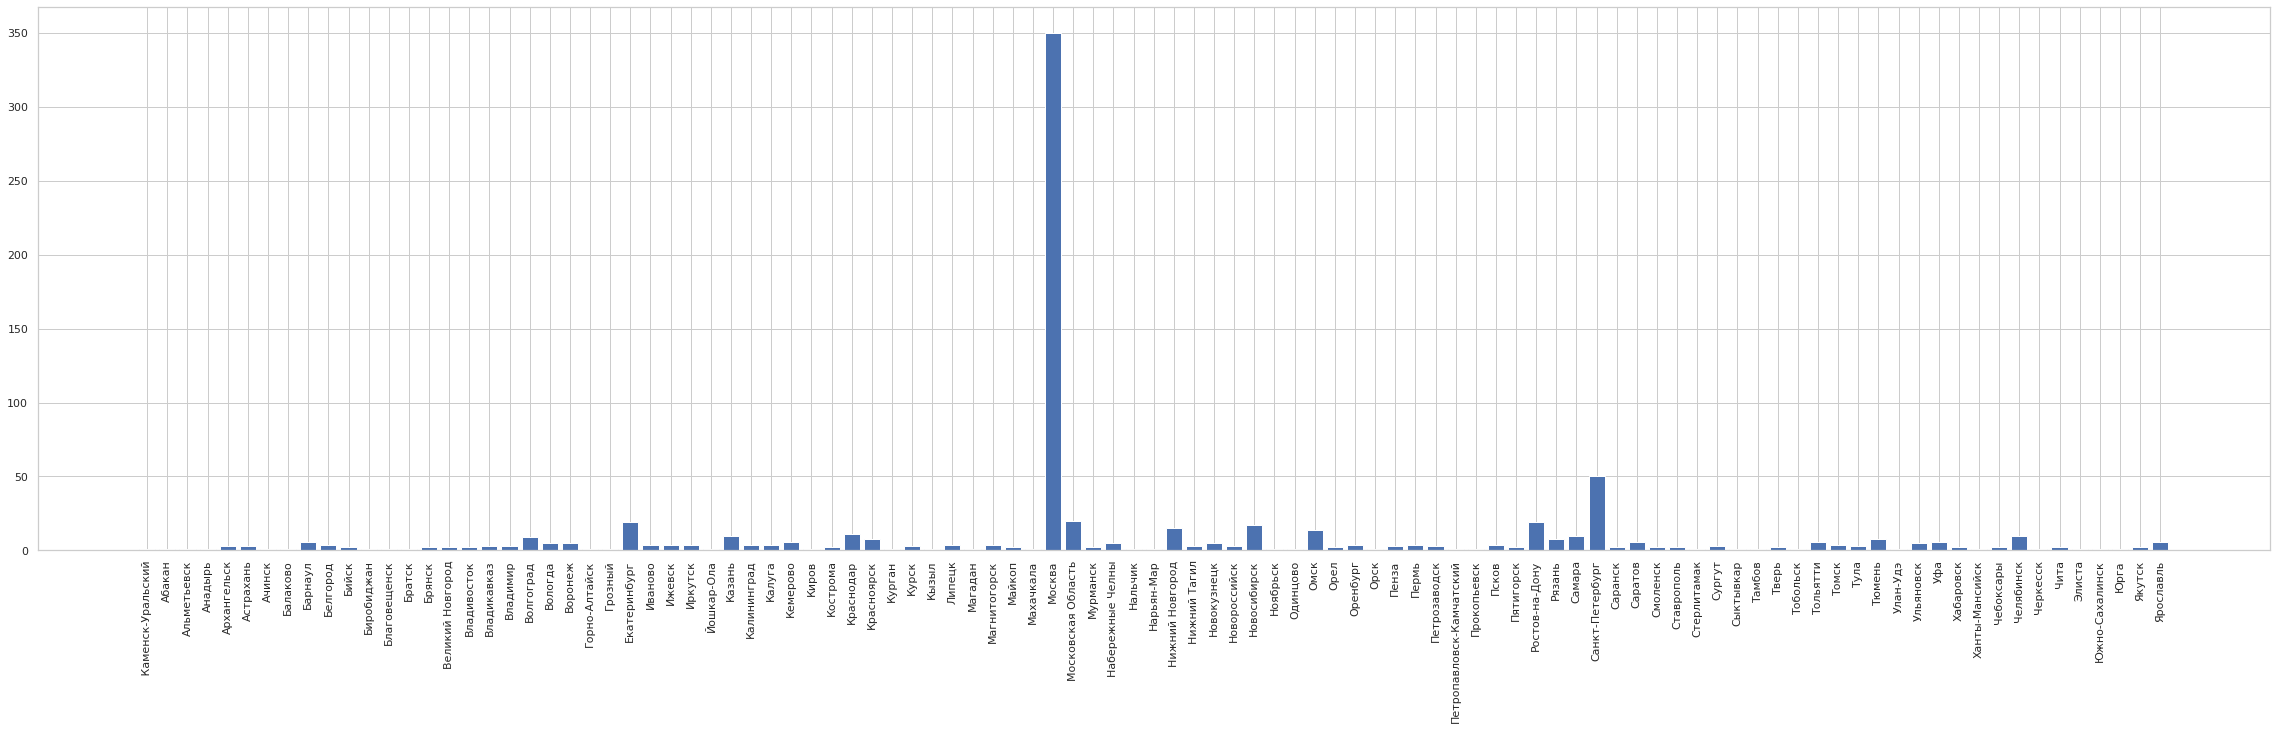

In [ ]:
sns.set()
sns.set_style("whitegrid")

city_data_gr = city_data.groupby(['city_name']).count()

sns.color_palette("pastel")

plt.figure(figsize=(40, 10))
plt.xticks(rotation=90)
plt.bar(dict(city_data_gr.iloc[:,0]).keys(), dict(city_data_gr.iloc[:,0]).values())

In [ ]:
data = pd.read_csv(f"{AUX_DATA_ROOT}"+"/prediction_raw.csv")
data.drop([0], inplace = True)
data.columns = ['user_id', 'product_id', 'count']
data['user_id'] = data['user_id'].astype('int')
data['product_id'] = data['product_id'].astype('int')
data['count'] = data['count'].astype('int')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
data['count']

1           16
2           13
3           13
4           12
5           11
            ..
15124317     1
15124318     1
15124319     1
15124320     1
15124321     1
Name: count, Length: 15124321, dtype: int64

In [ ]:
new_data = pd.pivot_table(data.groupby('user_id'), )

AttributeError: ignored

In [ ]:
data.groupby('user_id')

In [ ]:
data['mask'] = (data.groupby('user_id').cumcount() <= 49).astype(int)

In [ ]:
data_fix = data[data['mask'] != 0]

In [ ]:
data_fix = data_fix.drop('mask', 1)

In [ ]:
data_fix

,user_id,product_id,count
1,51,14863,16
2,51,19562,13
3,51,63057,13
4,51,3562687,12
5,51,709,11
...,...,...,...
15124317,3142875,5044950,1
15124318,3142875,5044951,1
15124319,3142875,5075130,1
15124320,3142875,5075131,1


In [ ]:
to_list_stuff = data_fix.groupby('user_id')['product_id'].apply(list)

In [ ]:
to_list_stuff_dict = dict(to_list_stuff)

In [ ]:
almost_final = pd.DataFrame.from_dict(to_list_stuff_dict,orient='index')

In [ ]:
almost_final

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
51,14863,19562.0,63057.0,3562687.0,709.0,9979.0,456.0,661.0,5501.0,3817489.0,655.0,562.0,54710.0,54728.0,407.0,2600.0,50190.0,57399.0,87007.0,3817538.0,6005183.0,46762.0,55049.0,84364.0,84365.0,3562686.0,0.0,5851.0,16219.0,55133.0,57398.0,63724.0,64633.0,93822.0,93825.0,3817487.0,5481648.0,487.0,5509.0,7397.0,16420.0,25198.0,27471.0,29788.0,38512.0,50539.0,56900.0,57383.0,57554.0,58780.0
65,54728,18450.0,3817542.0,709.0,18439.0,26062.0,105764.0,77152.0,5541.0,5639.0,4141822.0,55049.0,3302524.0,13821.0,14462.0,5469736.0,100789.0,201286.0,63048.0,36108.0,57289.0,100802.0,199796.0,2833472.0,3819571.0,4224674.0,5673.0,101069.0,103831.0,2589314.0,6375441.0,5178.0,54710.0,64916.0,8981.0,26763.0,67035.0,92368.0,101031.0,105514.0,2589313.0,5479458.0,848.0,1037.0,2063.0,10019.0,12792.0,37122.0,69471.0,4830912.0
187,88084,88086.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
400,0,813.0,94333.0,3817507.0,177.0,407.0,26751.0,55034.0,57085.0,61053.0,69033.0,3817484.0,4203260.0,5469728.0,5479511.0,5479797.0,5481691.0,6565232.0,41.0,397.0,487.0,981.0,5642.0,6613.0,6952.0,6992.0,8472.0,8545.0,9936.0,10198.0,12817.0,13109.0,13441.0,13541.0,14367.0,14466.0,15367.0,18428.0,18887.0,20286.0,20289.0,21904.0,22452.0,22979.0,24902.0,24961.0,25020.0,25717.0,29560.0,37067.0
576,177,2600.0,102.0,4443.0,5628.0,10002.0,10757.0,14007.0,46469.0,60105.0,60179.0,5046703.0,7103983.0,0.0,849.0,1727.0,1746.0,1786.0,2057.0,4431.0,4656.0,5182.0,5257.0,5275.0,7017.0,9501.0,9645.0,9690.0,9959.0,9979.0,10182.0,10186.0,10237.0,14286.0,14297.0,14731.0,14738.0,14743.0,15593.0,15916.0,16646.0,16980.0,18553.0,18887.0,20269.0,21505.0,21813.0,24475.0,26150.0,36067.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3142760,225,452.0,1985.0,5154.0,5601.0,6567.0,6757.0,8333.0,12817.0,13114.0,13118.0,13120.0,13121.0,13168.0,14564.0,14752.0,14758.0,15373.0,15375.0,17803.0,26342.0,29591.0,36852.0,39489.0,45448.0,45478.0,52692.0,57290.0,57291.0,57622.0,57828.0,58358.0,59292.0,59980.0,60019.0,60022.0,60024.0,60027.0,60583.0,64108.0,67419.0,68108.0,71050.0,72473.0,74392.0,76111.0,76112.0,76206.0,77052.0,77063.0
3142766,104,166.0,172.0,180.0,6341.0,14770.0,18438.0,19932.0,37061.0,50126.0,56900.0,58746.0,60451.0,60546.0,79248.0,102555.0,3043457.0,3043458.0,3823453.0,3826253.0,5044874.0,5045132.0,7343959.0,7365485.0,9339775.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3142774,14616,21868.0,201892.0,1159915.0,1159916.0,4033462.0,5045537.0,6695693.0,6782767.0,6782789.0,6805296.0,7398122.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3142820,0,13120.0,13181.0,14105.0,15375.0,22194.0,38251.0,38931.0,57517.0,62038.0,66966.0,72614.0,77405.0,78845.0,78849.0,80212.0,85340.0,4277109.0,4277111.0,4277211.0,7054238.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
top_ar = list(dict(almost_final[0].value_counts()).keys())[:50]

In [ ]:
almost_final_hf = almost_final.fillna(value=top_ar)

TypeError: ignored

In [ ]:
from tqdm import tqdm

In [ ]:
for _, row in tqdm(almost_final.iterrows()):
  print(type(row))
  break

0it [00:00, ?it/s]

<class 'pandas.core.series.Series'>


In [ ]:
almost_final

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
51,14863,19562.0,63057.0,3562687.0,709.0,9979.0,456.0,661.0,5501.0,3817489.0,655.0,562.0,54710.0,54728.0,407.0,2600.0,50190.0,57399.0,87007.0,3817538.0,6005183.0,46762.0,55049.0,84364.0,84365.0,3562686.0,0.0,5851.0,16219.0,55133.0,57398.0,63724.0,64633.0,93822.0,93825.0,3817487.0,5481648.0,487.0,5509.0,7397.0,16420.0,25198.0,27471.0,29788.0,38512.0,50539.0,56900.0,57383.0,57554.0,58780.0
65,54728,18450.0,3817542.0,709.0,18439.0,26062.0,105764.0,77152.0,5541.0,5639.0,4141822.0,55049.0,3302524.0,13821.0,14462.0,5469736.0,100789.0,201286.0,63048.0,36108.0,57289.0,100802.0,199796.0,2833472.0,3819571.0,4224674.0,5673.0,101069.0,103831.0,2589314.0,6375441.0,5178.0,54710.0,64916.0,8981.0,26763.0,67035.0,92368.0,101031.0,105514.0,2589313.0,5479458.0,848.0,1037.0,2063.0,10019.0,12792.0,37122.0,69471.0,4830912.0
187,88084,88086.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
400,0,813.0,94333.0,3817507.0,177.0,407.0,26751.0,55034.0,57085.0,61053.0,69033.0,3817484.0,4203260.0,5469728.0,5479511.0,5479797.0,5481691.0,6565232.0,41.0,397.0,487.0,981.0,5642.0,6613.0,6952.0,6992.0,8472.0,8545.0,9936.0,10198.0,12817.0,13109.0,13441.0,13541.0,14367.0,14466.0,15367.0,18428.0,18887.0,20286.0,20289.0,21904.0,22452.0,22979.0,24902.0,24961.0,25020.0,25717.0,29560.0,37067.0
576,177,2600.0,102.0,4443.0,5628.0,10002.0,10757.0,14007.0,46469.0,60105.0,60179.0,5046703.0,7103983.0,0.0,849.0,1727.0,1746.0,1786.0,2057.0,4431.0,4656.0,5182.0,5257.0,5275.0,7017.0,9501.0,9645.0,9690.0,9959.0,9979.0,10182.0,10186.0,10237.0,14286.0,14297.0,14731.0,14738.0,14743.0,15593.0,15916.0,16646.0,16980.0,18553.0,18887.0,20269.0,21505.0,21813.0,24475.0,26150.0,36067.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3142760,225,452.0,1985.0,5154.0,5601.0,6567.0,6757.0,8333.0,12817.0,13114.0,13118.0,13120.0,13121.0,13168.0,14564.0,14752.0,14758.0,15373.0,15375.0,17803.0,26342.0,29591.0,36852.0,39489.0,45448.0,45478.0,52692.0,57290.0,57291.0,57622.0,57828.0,58358.0,59292.0,59980.0,60019.0,60022.0,60024.0,60027.0,60583.0,64108.0,67419.0,68108.0,71050.0,72473.0,74392.0,76111.0,76112.0,76206.0,77052.0,77063.0
3142766,104,166.0,172.0,180.0,6341.0,14770.0,18438.0,19932.0,37061.0,50126.0,56900.0,58746.0,60451.0,60546.0,79248.0,102555.0,3043457.0,3043458.0,3823453.0,3826253.0,5044874.0,5045132.0,7343959.0,7365485.0,9339775.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3142774,14616,21868.0,201892.0,1159915.0,1159916.0,4033462.0,5045537.0,6695693.0,6782767.0,6782789.0,6805296.0,7398122.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3142820,0,13120.0,13181.0,14105.0,15375.0,22194.0,38251.0,38931.0,57517.0,62038.0,66966.0,72614.0,77405.0,78845.0,78849.0,80212.0,85340.0,4277109.0,4277111.0,4277211.0,7054238.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
for column in almost_final:
  print(list(dict(almost_final[column].value_counts()).keys())[1])

709
709.0
709.0
709.0
709.0
709.0
709.0
709.0
709.0
709.0
709.0
709.0
709.0
709.0
709.0
709.0
709.0
709.0
709.0
709.0
709.0
709.0
709.0
709.0
709.0
709.0
709.0
709.0
709.0
709.0
709.0
709.0
709.0
709.0
709.0
39590.0
709.0
709.0
709.0
709.0
709.0
39590.0
709.0
1300.0
0.0
0.0
709.0
39590.0
67694.0
709.0


In [ ]:
almost_final_hf = almost_final_hf.reset_index()

In [ ]:
almost_final_hf.columns = ['Id', 'Predicted']
almost_final_hf['Id'] = almost_final_hf['Id'].astype('int')
almost_final_hf['Predicted'] = almost_final_hf['Predicted']

In [ ]:
almost_final_hf.Predicted[0]

[14863.0,
 19562.0,
 63057.0,
 3562687.0,
 709.0,
 9979.0,
 456.0,
 661.0,
 5501.0,
 3817489.0,
 655.0,
 562.0,
 54710.0,
 54728.0,
 407.0,
 2600.0,
 50190.0,
 57399.0,
 87007.0,
 3817538.0,
 6005183.0,
 46762.0,
 55049.0,
 84364.0,
 84365.0,
 3562686.0,
 0.0,
 5851.0,
 16219.0,
 55133.0,
 57398.0,
 63724.0,
 64633.0,
 93822.0,
 93825.0,
 3817487.0,
 5481648.0,
 487.0,
 5509.0,
 7397.0,
 16420.0,
 25198.0,
 27471.0,
 29788.0,
 38512.0,
 50539.0,
 56900.0,
 57383.0,
 57554.0,
 58780.0]

In [ ]:
type(pd.read_csv("sample_submission.csv").Predicted[0])

str

In [ ]:
almost_final_hf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
51,14863,19562.0,63057.0,3562687.0,709.0,9979.0,456.0,661.0,5501.0,3817489.0,655.0,562.0,54710.0,54728.0,407.0,2600.0,50190.0,57399.0,87007.0,3817538.0,6005183.0,46762.0,55049.0,84364.0,84365.0,3562686.0,0.0,5851.0,16219.0,55133.0,57398.0,63724.0,64633.0,93822.0,93825.0,3817487.0,5481648.0,487.0,5509.0,7397.0,16420.0,25198.0,27471.0,29788.0,38512.0,50539.0,56900.0,57383.0,57554.0,58780.0
65,54728,18450.0,3817542.0,709.0,18439.0,26062.0,105764.0,77152.0,5541.0,5639.0,4141822.0,55049.0,3302524.0,13821.0,14462.0,5469736.0,100789.0,201286.0,63048.0,36108.0,57289.0,100802.0,199796.0,2833472.0,3819571.0,4224674.0,5673.0,101069.0,103831.0,2589314.0,6375441.0,5178.0,54710.0,64916.0,8981.0,26763.0,67035.0,92368.0,101031.0,105514.0,2589313.0,5479458.0,848.0,1037.0,2063.0,10019.0,12792.0,37122.0,69471.0,4830912.0
187,88084,88086.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0
400,0,813.0,94333.0,3817507.0,177.0,407.0,26751.0,55034.0,57085.0,61053.0,69033.0,3817484.0,4203260.0,5469728.0,5479511.0,5479797.0,5481691.0,6565232.0,41.0,397.0,487.0,981.0,5642.0,6613.0,6952.0,6992.0,8472.0,8545.0,9936.0,10198.0,12817.0,13109.0,13441.0,13541.0,14367.0,14466.0,15367.0,18428.0,18887.0,20286.0,20289.0,21904.0,22452.0,22979.0,24902.0,24961.0,25020.0,25717.0,29560.0,37067.0
576,177,2600.0,102.0,4443.0,5628.0,10002.0,10757.0,14007.0,46469.0,60105.0,60179.0,5046703.0,7103983.0,0.0,849.0,1727.0,1746.0,1786.0,2057.0,4431.0,4656.0,5182.0,5257.0,5275.0,7017.0,9501.0,9645.0,9690.0,9959.0,9979.0,10182.0,10186.0,10237.0,14286.0,14297.0,14731.0,14738.0,14743.0,15593.0,15916.0,16646.0,16980.0,18553.0,18887.0,20269.0,21505.0,21813.0,24475.0,26150.0,36067.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3142760,225,452.0,1985.0,5154.0,5601.0,6567.0,6757.0,8333.0,12817.0,13114.0,13118.0,13120.0,13121.0,13168.0,14564.0,14752.0,14758.0,15373.0,15375.0,17803.0,26342.0,29591.0,36852.0,39489.0,45448.0,45478.0,52692.0,57290.0,57291.0,57622.0,57828.0,58358.0,59292.0,59980.0,60019.0,60022.0,60024.0,60027.0,60583.0,64108.0,67419.0,68108.0,71050.0,72473.0,74392.0,76111.0,76112.0,76206.0,77052.0,77063.0
3142766,104,166.0,172.0,180.0,6341.0,14770.0,18438.0,19932.0,37061.0,50126.0,56900.0,58746.0,60451.0,60546.0,79248.0,102555.0,3043457.0,3043458.0,3823453.0,3826253.0,5044874.0,5045132.0,7343959.0,7365485.0,9339775.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0
3142774,14616,21868.0,201892.0,1159915.0,1159916.0,4033462.0,5045537.0,6695693.0,6782767.0,6782789.0,6805296.0,7398122.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0
3142820,0,13120.0,13181.0,14105.0,15375.0,22194.0,38251.0,38931.0,57517.0,62038.0,66966.0,72614.0,77405.0,78845.0,78849.0,80212.0,85340.0,4277109.0,4277111.0,4277211.0,7054238.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0,709.0


In [ ]:
almost_final_hf.to_csv(f"{AUX_DATA_ROOT}"+"/aaaaaaaaaaa.csv", index=False, sep=" ")

In [ ]:
pd.read_csv(f"{AUX_DATA_ROOT}"+"/aaaaaaaaaaa.csv")

,Id,Predicted
0,51,"[14863.0, 19562.0, 63057.0, 3562687.0, 709.0, ..."
1,65,"[54728.0, 18450.0, 3817542.0, 709.0, 18439.0, ..."
2,187,"[88084.0, 88086.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...."
3,400,"[0.0, 813.0, 94333.0, 3817507.0, 177.0, 407.0,..."
4,576,"[177.0, 2600.0, 102.0, 4443.0, 5628.0, 10002.0..."
...,...,...
107063,3142760,"[225.0, 452.0, 1985.0, 5154.0, 5601.0, 6567.0,..."
107064,3142766,"[104.0, 166.0, 172.0, 180.0, 6341.0, 14770.0, ..."
107065,3142774,"[14616.0, 21868.0, 201892.0, 1159915.0, 115991..."
107066,3142820,"[0.0, 13120.0, 13181.0, 14105.0, 15375.0, 2219..."


In [ ]:
data.columns = ['Id', 'Predicted']
data['Id'] = data['Id'].astype('int')
data['Predicted'] = data['Predicted'].astype('int')

ValueError: ignored

In [ ]:
almost_final_hf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
51,14863,19562.0,63057.0,3562687.0,709.0,9979.0,456.0,661.0,5501.0,3817489.0,655.0,562.0,54710.0,54728.0,407.0,2600.0,50190.0,57399.0,87007.0,3817538.0,6005183.0,46762.0,55049.0,84364.0,84365.0,3562686.0,0.0,5851.0,16219.0,55133.0,57398.0,63724.0,64633.0,93822.0,93825.0,3817487.0,5481648.0,487.0,5509.0,7397.0,16420.0,25198.0,27471.0,29788.0,38512.0,50539.0,56900.0,57383.0,57554.0,58780.0
65,54728,18450.0,3817542.0,709.0,18439.0,26062.0,105764.0,77152.0,5541.0,5639.0,4141822.0,55049.0,3302524.0,13821.0,14462.0,5469736.0,100789.0,201286.0,63048.0,36108.0,57289.0,100802.0,199796.0,2833472.0,3819571.0,4224674.0,5673.0,101069.0,103831.0,2589314.0,6375441.0,5178.0,54710.0,64916.0,8981.0,26763.0,67035.0,92368.0,101031.0,105514.0,2589313.0,5479458.0,848.0,1037.0,2063.0,10019.0,12792.0,37122.0,69471.0,4830912.0
187,88084,88086.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
400,0,813.0,94333.0,3817507.0,177.0,407.0,26751.0,55034.0,57085.0,61053.0,69033.0,3817484.0,4203260.0,5469728.0,5479511.0,5479797.0,5481691.0,6565232.0,41.0,397.0,487.0,981.0,5642.0,6613.0,6952.0,6992.0,8472.0,8545.0,9936.0,10198.0,12817.0,13109.0,13441.0,13541.0,14367.0,14466.0,15367.0,18428.0,18887.0,20286.0,20289.0,21904.0,22452.0,22979.0,24902.0,24961.0,25020.0,25717.0,29560.0,37067.0
576,177,2600.0,102.0,4443.0,5628.0,10002.0,10757.0,14007.0,46469.0,60105.0,60179.0,5046703.0,7103983.0,0.0,849.0,1727.0,1746.0,1786.0,2057.0,4431.0,4656.0,5182.0,5257.0,5275.0,7017.0,9501.0,9645.0,9690.0,9959.0,9979.0,10182.0,10186.0,10237.0,14286.0,14297.0,14731.0,14738.0,14743.0,15593.0,15916.0,16646.0,16980.0,18553.0,18887.0,20269.0,21505.0,21813.0,24475.0,26150.0,36067.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3142760,225,452.0,1985.0,5154.0,5601.0,6567.0,6757.0,8333.0,12817.0,13114.0,13118.0,13120.0,13121.0,13168.0,14564.0,14752.0,14758.0,15373.0,15375.0,17803.0,26342.0,29591.0,36852.0,39489.0,45448.0,45478.0,52692.0,57290.0,57291.0,57622.0,57828.0,58358.0,59292.0,59980.0,60019.0,60022.0,60024.0,60027.0,60583.0,64108.0,67419.0,68108.0,71050.0,72473.0,74392.0,76111.0,76112.0,76206.0,77052.0,77063.0
3142766,104,166.0,172.0,180.0,6341.0,14770.0,18438.0,19932.0,37061.0,50126.0,56900.0,58746.0,60451.0,60546.0,79248.0,102555.0,3043457.0,3043458.0,3823453.0,3826253.0,5044874.0,5045132.0,7343959.0,7365485.0,9339775.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3142774,14616,21868.0,201892.0,1159915.0,1159916.0,4033462.0,5045537.0,6695693.0,6782767.0,6782789.0,6805296.0,7398122.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3142820,0,13120.0,13181.0,14105.0,15375.0,22194.0,38251.0,38931.0,57517.0,62038.0,66966.0,72614.0,77405.0,78845.0,78849.0,80212.0,85340.0,4277109.0,4277111.0,4277211.0,7054238.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
almost_final_hf.columns

RangeIndex(start=0, stop=50, step=1)

In [ ]:
almost_final_hf = almost_final_hf.astype(int)

In [ ]:
almost_final_hf = almost_final_hf.apply(lambda row: ' '.join(row.values.astype(str)), axis=1)

In [ ]:
almost_final_hf = almost_final_hf.filter(['Predicted'])

In [ ]:
almost_final_hf

KeyboardInterrupt: ignored

In [ ]:
almost_final_hf.to_csv(f"{AUX_DATA_ROOT}"+"/keыыыkekek.csv")

In [ ]:
data = pd.read_csv(f"{AUX_DATA_ROOT}"+"/keыыыkekek.csv")

In [ ]:
data

,Unnamed: 0,0
0,51,14863 19562 63057 3562687 709 9979 456 661 550...
1,65,54728 18450 3817542 709 18439 26062 105764 771...
2,187,88084 88086 709 709 709 709 709 709 709 709 70...
3,400,0 813 94333 3817507 177 407 26751 55034 57085 ...
4,576,177 2600 102 4443 5628 10002 10757 14007 46469...
...,...,...
107063,3142760,225 452 1985 5154 5601 6567 6757 8333 12817 13...
107064,3142766,104 166 172 180 6341 14770 18438 19932 37061 5...
107065,3142774,14616 21868 201892 1159915 1159916 4033462 504...
107066,3142820,0 13120 13181 14105 15375 22194 38251 38931 57...


In [ ]:
data.columns = ['Id', 'Predicted']
data['Id'] = data['Id'].astype('int')
data['Predicted'] = data['Predicted']

In [ ]:
data

,Id,Predicted
0,51,14863 19562 63057 3562687 709 9979 456 661 550...
1,65,54728 18450 3817542 709 18439 26062 105764 771...
2,187,88084 88086 709 709 709 709 709 709 709 709 70...
3,400,0 813 94333 3817507 177 407 26751 55034 57085 ...
4,576,177 2600 102 4443 5628 10002 10757 14007 46469...
...,...,...
107063,3142760,225 452 1985 5154 5601 6567 6757 8333 12817 13...
107064,3142766,104 166 172 180 6341 14770 18438 19932 37061 5...
107065,3142774,14616 21868 201892 1159915 1159916 4033462 504...
107066,3142820,0 13120 13181 14105 15375 22194 38251 38931 57...


In [ ]:
data.to_csv(f"{AUX_DATA_ROOT}"+"/fuckers_suckers.csv", index=False)

In [ ]:
pd.read_csv(f"{AUX_DATA_ROOT}"+"/fuckers.csv")

,Id,Predicted
0,51,14863 19562 63057 3562687 709 9979 456 661 550...
1,65,54728 18450 3817542 709 18439 26062 105764 771...
2,187,88084 88086 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
3,400,0 813 94333 3817507 177 407 26751 55034 57085 ...
4,576,177 2600 102 4443 5628 10002 10757 14007 46469...
...,...,...
107063,3142760,225 452 1985 5154 5601 6567 6757 8333 12817 13...
107064,3142766,104 166 172 180 6341 14770 18438 19932 37061 5...
107065,3142774,14616 21868 201892 1159915 1159916 4033462 504...
107066,3142820,0 13120 13181 14105 15375 22194 38251 38931 57...


In [ ]:
data

,Unnamed: 0,0
0,0,14863 19562 63057 3562687 709 9979 456 661 550...
1,1,54728 18450 3817542 709 18439 26062 105764 771...
2,2,88084 88086 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
3,3,0 813 94333 3817507 177 407 26751 55034 57085 ...
4,4,177 2600 102 4443 5628 10002 10757 14007 46469...
...,...,...
107063,107063,225 452 1985 5154 5601 6567 6757 8333 12817 13...
107064,107064,104 166 172 180 6341 14770 18438 19932 37061 5...
107065,107065,14616 21868 201892 1159915 1159916 4033462 504...
107066,107066,0 13120 13181 14105 15375 22194 38251 38931 57...


In [ ]:
import numpy as np

In [ ]:
type(data.Predicted[3])

str

In [ ]:
data.columns = ['Id', 'Predicted']
data['Id'] = data['Id'].astype('int')
data['Predicted'] = data['Predicted'].astype('int')

ValueError: ignored